In [ ]:
### Policing and Environment Group Assignment Two
# We merged our environmental justice scores data frame with the LA census data for 2012 data frame with the object "FIPS".
# By adding a leading *zero* to our EJSM data, we were able to geographically match the two data frames. 
# The cumulative impact score includes the variables of climate change vulnerability, environmental hazards, social vulnerability, and health scores. 
# We chose to map the hazard, social vulnerability, and cumulative impact scores to demonstrate some of the overlaps between negative environmental outcomes in areas with high scores of social vulnerabilities. 
# Our final maps display the disporportionate distributions of environmental degredation in South, Central, and East Los Angeles. 

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# import LA environmental justice score data 
df = pd.read_csv(
'Data/EJSM_Scores/EJSM_Scores (1).csv' ,
dtype={
    'Tract_1':str
})

In [3]:
# add number zero leading the FIPS code for merging the data with the census tract data
df['Tract_1'] = df['Tract_1'].str.zfill(11)
df.head()

,OBJECTID,Tract_1,CIscore,HazScore,HealthScore,SVscore,CCVscore,Shape__Area,Shape__Length
0,1,06037920336,10,3,1,4,2,2.438560e+06,8124.373091
1,2,06037920044,4,1,1,1,1,1.470811e+06,5545.298452
2,3,06037573003,13,5,3,3,2,6.528168e+05,3310.743793
3,4,06037571704,13,3,2,4,4,6.994011e+05,4113.477175
4,5,06037570403,17,5,3,5,4,8.317839e+05,3887.000394


In [4]:
# import 2012 census data
tracts=gpd.read_file('Data/CensusData2012/census-tracts-2012.geojson')
print(tracts)

                     kind  external_id         name  \
0     Census Tract (2012)  06037101110  06037101110   
1     Census Tract (2012)  06037101122  06037101122   
2     Census Tract (2012)  06037101210  06037101210   
3     Census Tract (2012)  06037101220  06037101220   
4     Census Tract (2012)  06037101300  06037101300   
...                   ...          ...          ...   
2341  Census Tract (2012)  06037980031  06037980031   
2342  Census Tract (2012)  06037980033  06037980033   
2343  Census Tract (2012)  06037990100  06037990100   
2344  Census Tract (2012)  06037990200  06037990200   
2345  Census Tract (2012)  06037990300  06037990300   

                               slug                                    set  \
0     06037101110-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
1     06037101122-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
2     06037101210-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
3     06037101220-census-tr

In [5]:
# list column names
list(tracts)

['kind',
 'external_id',
 'name',
 'slug',
 'set',
 'metadata',
 'resource_uri',
 'geometry']

In [6]:
# drop columns
columns_to_drop = ['set','kind','resource_uri','metadata']

In [7]:
# read columns 
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [8]:
# drop columns from tracts data
tracts = tracts.drop(columns_to_drop,axis=1)

In [9]:
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   external_id  2346 non-null   object  
 1   name         2346 non-null   object  
 2   slug         2346 non-null   object  
 3   geometry     2346 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 73.4+ KB


In [10]:
# isolate the FIPS code and geometry column to match with the EJSM data
tracts = tracts[['name','geometry']]
tracts.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [11]:
# show columns
tracts.columns = ['FIPS','geometry']
tracts.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


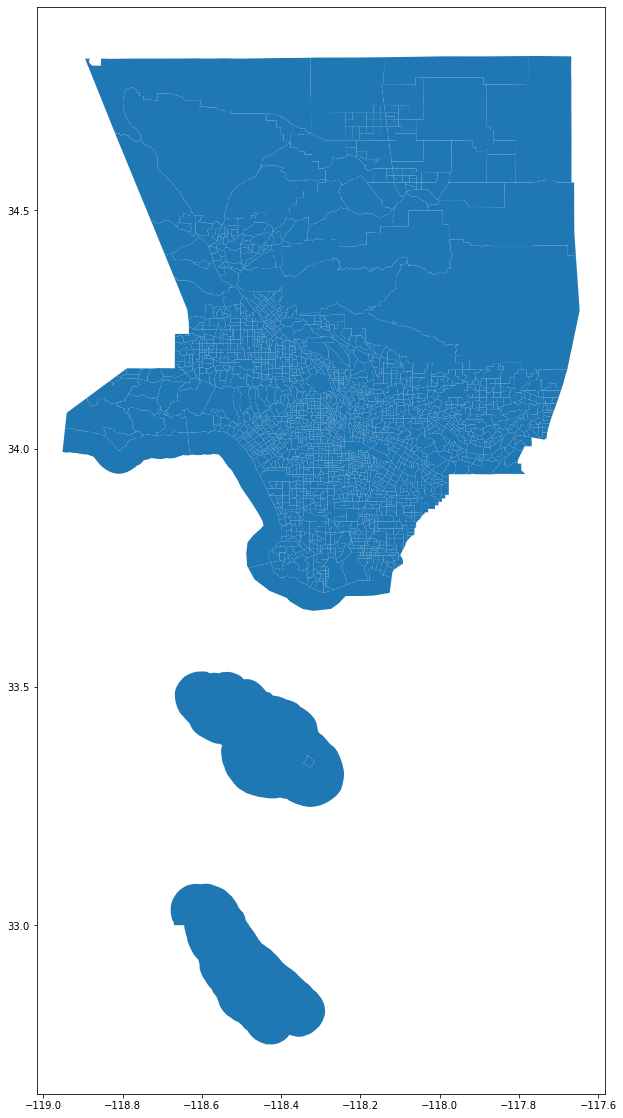

In [12]:
#plot tracts
tracts.plot(figsize=(24,20))

In [13]:
# list EJSM df with new FIPS code
list(df)

['OBJECTID',
 'Tract_1',
 'CIscore',
 'HazScore',
 'HealthScore',
 'SVscore',
 'CCVscore',
 'Shape__Area',
 'Shape__Length']

In [14]:
# show data
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       2343 non-null   int64  
 1   Tract_1        2343 non-null   object 
 2   CIscore        2343 non-null   int64  
 3   HazScore       2343 non-null   int64  
 4   HealthScore    2343 non-null   int64  
 5   SVscore        2343 non-null   int64  
 6   CCVscore       2343 non-null   int64  
 7   Shape__Area    2343 non-null   float64
 8   Shape__Length  2343 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 164.9+ KB


In [15]:
# rename object Tract_1 to FIPS to match census tract data
df.columns = ['OBJECTID',
 'FIPS',
 'CIscore',
 'HazScore',
 'HealthScore',
 'SVscore',
 'CCVscore',
 'Shape__Area',
 'Shape__Length']
df.head()

,OBJECTID,FIPS,CIscore,HazScore,HealthScore,SVscore,CCVscore,Shape__Area,Shape__Length
0,1,06037920336,10,3,1,4,2,2.438560e+06,8124.373091
1,2,06037920044,4,1,1,1,1,1.470811e+06,5545.298452
2,3,06037573003,13,5,3,3,2,6.528168e+05,3310.743793
3,4,06037571704,13,3,2,4,4,6.994011e+05,4113.477175
4,5,06037570403,17,5,3,5,4,8.317839e+05,3887.000394


In [16]:
# merge data on the same object FIPS
tracts_ejsm=tracts.merge(df,on="FIPS")

In [17]:
# show merge with census data (only population)
tracts_ejsm.head()

,FIPS,geometry,OBJECTID,CIscore,HazScore,HealthScore,SVscore,CCVscore,Shape__Area,Shape__Length
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",1464,10,3,1,3,3,1.677572e+06,5561.283410
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",672,4,1,1,1,1,3.891711e+06,11660.850429
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",1446,14,4,1,4,5,9.516179e+05,4451.778658
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",1703,12,3,1,4,4,1.026836e+06,4673.869604
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",1579,5,1,1,1,2,3.781233e+06,10813.184183


In [18]:
# describe stats by cumulative impact score
tracts_ejsm['CIscore'].describe()

count    2342.000000
mean       12.007259
std         4.352322
min         0.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        20.000000
Name: CIscore, dtype: float64

In [19]:
# import
import folium

In [20]:
# This section is an addition for the midterm 

In [21]:
import plotly.express as px
from sodapy import Socrata

In [70]:
client = Socrata("data.lacity.org", None)
results = client.get("amvf-fr72", limit=10000)
where = "arst_date between '2020-09-01T00:00:00' and '2020-09-30T00:00:00'"
df = pd.DataFrame.from_records(results)
df.sample(8)

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,chrg_grp_cd,grp_description,chrg_desc,crsst,bkg_date,bkg_time,bgk_location,bkg_loc_cd
3217,5931713,BOOKING,2020-05-13T00:00:00.000,1855,20,Olympic,2079,19,M,H,...,11,8,04,Aggravated Assault,ADW W/FIREARM,ARAPAHOE,2020-05-14T00:00:00.000,0034,METRO - JAIL DIVISION,4273
5608,5965656,BOOKING,2020-07-03T00:00:00.000,1825,13,Newton,1383,31,M,H,...,13,46,03,Robbery,ROBBERY,BROADWAY,2020-07-04T00:00:00.000,0116,METRO - JAIL DIVISION,4273
4768,201313675,RFC,2020-07-08T00:00:00.000,0921,13,Newton,1307,43,M,B,...,9,76,17,Liquor Laws,DRINKING ALCOHOL*******,CROCKER,NaN,NaN,NaN,NaN
5492,5966216,BOOKING,2020-07-05T00:00:00.000,0100,05,Harbor,0566,29,M,H,...,15,36,16,Narcotic Drug Laws,POSSESSION CONTROLLED SUBSTANCE,BEACON,2020-07-05T00:00:00.000,0522,HARBOR,4205
4178,6014152,BOOKING,2020-09-17T00:00:00.000,1300,08,West LA,0847,23,M,H,...,6,75,24,Miscellaneous Other Violations,VANDALISM W/LOSS VALUED EQ OR > $400,FOX HILLS DR,2020-09-17T00:00:00.000,2045,METRO - JAIL DIVISION,4273
392,5952519,BOOKING,2020-06-11T00:00:00.000,0030,17,Devonshire,1756,19,M,H,...,2,87,07,Vehicle Theft,TAKE VEHICLE W/O OWNER'S CONSENT,NaN,2020-06-11T00:00:00.000,0249,VALLEY - JAIL DIV,4279
2210,6000626,BOOKING,2020-08-27T00:00:00.000,1720,20,Olympic,2015,20,F,B,...,8,89,16,Narcotic Drug Laws,MAINTAIN PLACE TO SELL CONTROLLED SUBS,NaN,2020-08-27T00:00:00.000,2253,METRO - JAIL DIVISION,4273
9448,6017948,BOOKING,2020-09-23T00:00:00.000,1945,16,Foothill,1651,20,M,H,...,1,11,12,Weapon (carry/poss),CARRY LOADED F/ARM PRSON/HEH PUBLIC PLACE,KAMLOOPS,2020-09-23T00:00:00.000,2300,VALLEY - JAIL DIV,4279


In [59]:
df = pd.DataFrame.from_records(results)

In [71]:
df.info()
crime = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rpt_id                       10000 non-null  object
 1   report_type                  10000 non-null  object
 2   arst_date                    10000 non-null  object
 3   time                         10000 non-null  object
 4   area                         10000 non-null  object
 5   area_desc                    10000 non-null  object
 6   rd                           10000 non-null  object
 7   age                          10000 non-null  object
 8   sex_cd                       10000 non-null  object
 9   descent_cd                   10000 non-null  object
 10  arst_typ_cd                  10000 non-null  object
 11  charge                       10000 non-null  object
 12  dispo_desc                   9217 non-null   object
 13  location                     100

In [72]:
df.arst_date.unique()

array(['2020-09-14T00:00:00.000', '2020-07-09T00:00:00.000',
       '2020-07-29T00:00:00.000', '2020-09-16T00:00:00.000',
       '2020-07-23T00:00:00.000', '2020-08-06T00:00:00.000',
       '2020-09-05T00:00:00.000', '2020-02-14T00:00:00.000',
       '2020-03-25T00:00:00.000', '2020-09-02T00:00:00.000',
       '2020-09-13T00:00:00.000', '2020-08-05T00:00:00.000',
       '2020-08-04T00:00:00.000', '2020-06-23T00:00:00.000',
       '2020-06-24T00:00:00.000', '2020-08-24T00:00:00.000',
       '2020-09-19T00:00:00.000', '2020-08-15T00:00:00.000',
       '2020-07-10T00:00:00.000', '2020-06-17T00:00:00.000',
       '2020-07-13T00:00:00.000', '2020-06-18T00:00:00.000',
       '2020-09-17T00:00:00.000', '2020-07-16T00:00:00.000',
       '2020-08-25T00:00:00.000', '2020-08-10T00:00:00.000',
       '2020-08-27T00:00:00.000', '2020-09-12T00:00:00.000',
       '2020-09-04T00:00:00.000', '2020-09-07T00:00:00.000',
       '2020-09-15T00:00:00.000', '2020-08-31T00:00:00.000',
       '2020-08-17T00:00

In [52]:
df.grp_description.unique()

array(['Robbery', nan, 'Liquor Laws', 'Aggravated Assault',
       'Prostitution/Allied', 'Narcotic Drug Laws',
       'Driving Under Influence', 'Gambling', 'Burglary', 'Drunkeness',
       'Vehicle Theft', 'Miscellaneous Other Violations',
       'Other Assaults', 'Against Family/Child', 'Fraud/Embezzlement',
       'Weapon (carry/poss)', 'Moving Traffic Violations',
       'Disorderly Conduct', 'Forgery/Counterfeit', 'Homicide',
       'Receive Stolen Property', 'Non-Criminal Detention', 'Larceny',
       'Rape', 'Sex (except rape/prst)', 'Disturbing the Peace',
       'Pre-Delinquency'], dtype=object)

In [73]:
#list arrest df
list(df)

['rpt_id',
 'report_type',
 'arst_date',
 'time',
 'area',
 'area_desc',
 'rd',
 'age',
 'sex_cd',
 'descent_cd',
 'arst_typ_cd',
 'charge',
 'dispo_desc',
 'location',
 'lat',
 ':@computed_region_qz3q_ghft',
 'lon',
 'location_1',
 ':@computed_region_k96s_3jcv',
 ':@computed_region_tatf_ua23',
 ':@computed_region_ur2y_g4cx',
 ':@computed_region_kqwf_mjcx',
 ':@computed_region_2dna_qi2s',
 'chrg_grp_cd',
 'grp_description',
 'chrg_desc',
 'crsst',
 'bkg_date',
 'bkg_time',
 'bgk_location',
 'bkg_loc_cd',
 'geometry']

In [74]:
crime = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat)) 

In [24]:
df.grp_description.unique()

array([nan, 'Liquor Laws', 'Drunkeness', 'Aggravated Assault',
       'Driving Under Influence', 'Prostitution/Allied',
       'Narcotic Drug Laws', 'Robbery', 'Burglary', 'Disorderly Conduct',
       'Gambling', 'Other Assaults', 'Miscellaneous Other Violations',
       'Against Family/Child', 'Fraud/Embezzlement', 'Vehicle Theft',
       'Weapon (carry/poss)', 'Moving Traffic Violations',
       'Forgery/Counterfeit', 'Homicide', 'Receive Stolen Property',
       'Non-Criminal Detention', 'Larceny', 'Sex (except rape/prst)',
       'Rape', 'Disturbing the Peace', 'Pre-Delinquency'], dtype=object)

In [64]:
#make an array of types
df.arst_typ_cd.unique()

array(['F', 'M', 'I', 'D', 'O'], dtype=object)

In [65]:
px.bar(df,
       x='arst_date',
       title='LAPD Arrests by Charge Type in September, 2020',
       labels={'arst_date':'Arrest date','count':'Number of arrests'}
      )

In [42]:
#grouped by date
df.groupby(['arst_date']).count()

,rpt_id,report_type,time,area,area_desc,rd,age,sex_cd,descent_cd,arst_typ_cd,...,:@computed_region_2dna_qi2s,chrg_grp_cd,grp_description,chrg_desc,crsst,bkg_date,bkg_time,bgk_location,bkg_loc_cd,geometry
arst_date,,,,,,,,,,,,,,,,,,,,,
2020-01-01T00:00:00.000,9,9,9,9,9,9,9,9,9,9,...,8,9,9,9,8,9,9,9,9,9
2020-01-02T00:00:00.000,3,3,3,3,3,3,3,3,3,3,...,2,3,3,3,1,3,3,3,3,3
2020-01-03T00:00:00.000,5,5,5,5,5,5,5,5,5,5,...,5,3,3,5,2,3,3,3,3,5
2020-01-04T00:00:00.000,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,0,3,3,3,3,3
2020-01-05T00:00:00.000,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,1,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-22T00:00:00.000,66,66,66,66,66,66,66,66,66,66,...,66,62,62,62,30,54,54,54,54,66
2020-09-23T00:00:00.000,67,67,67,67,67,67,67,67,67,67,...,62,65,65,65,29,58,58,58,58,67
2020-09-24T00:00:00.000,63,63,63,63,63,63,63,63,63,63,...,59,57,57,57,38,46,46,46,46,63


In [67]:
px.bar(df_flat,
       x='arst_date',
       y='rpt_id'
      )

In [44]:
#by date
df_flat = df_grouped.reset_index()
df_flat

,arst_date,grp_description,rpt_id
0,2020-01-01T00:00:00.000,Aggravated Assault,2
1,2020-01-01T00:00:00.000,Narcotic Drug Laws,2
2,2020-01-01T00:00:00.000,Other Assaults,2
3,2020-01-01T00:00:00.000,Receive Stolen Property,2
4,2020-01-01T00:00:00.000,Weapon (carry/poss),1
...,...,...,...
2393,2020-09-26T00:00:00.000,Miscellaneous Other Violations,3
2394,2020-09-26T00:00:00.000,Moving Traffic Violations,1
2395,2020-09-26T00:00:00.000,Narcotic Drug Laws,3
2396,2020-09-26T00:00:00.000,Other Assaults,2


In [29]:
#making a subset is not necessary
df_subset = df[['arst_date','grp_description','arst_typ_cd','lat','lon']].copy()

In [ ]:
#could delete
arrest_by_charge = df.grp_description.value_counts().reset_index()
arrest_by_charge

In [ ]:
# category value counts - can use for any variable  
arst_typ_cd = df.arst_typ_cd.value_counts().reset_index()
arst_typ_cd

In [31]:
# geopandas geodata frame - name geometry to make axis data lat and lon
crime = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

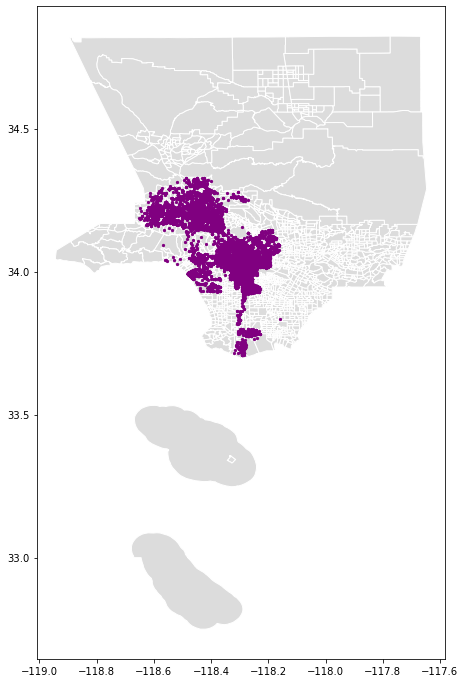

In [77]:
# make base map with points of crime all types- should use plotly now a
base = tracts_ejsm.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = crime.plot(ax=base, color='purple', markersize=5)

In [78]:
#got geometry
crime.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   rpt_id                       10000 non-null  object  
 1   report_type                  10000 non-null  object  
 2   arst_date                    10000 non-null  object  
 3   time                         10000 non-null  object  
 4   area                         10000 non-null  object  
 5   area_desc                    10000 non-null  object  
 6   rd                           10000 non-null  object  
 7   age                          10000 non-null  object  
 8   sex_cd                       10000 non-null  object  
 9   descent_cd                   10000 non-null  object  
 10  arst_typ_cd                  10000 non-null  object  
 11  charge                       10000 non-null  object  
 12  dispo_desc                   9217 non-null   object  

In [68]:
minx, miny, maxx, maxy = crime.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.6536
-118.1589
33.707
34.3274


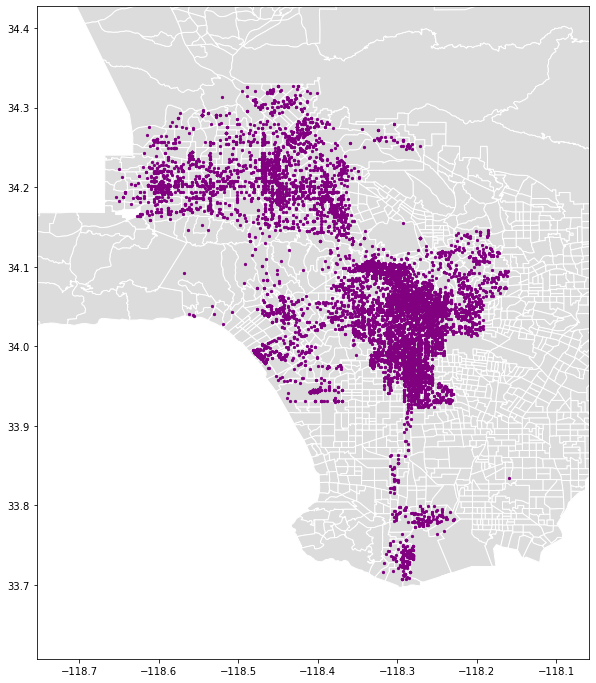

In [69]:
#basic scatter plot

base = tracts_ejsm.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = crime.plot(ax=base, marker='o', color='purple', markersize=5)
ax.set_xlim(minx - .1, maxx + .1)
ax.set_ylim(miny - .1, maxy + .1)
ax

In [137]:
crime['lat'] = crime['lat'].astype(float)
crime['lon'] = crime['lon'].astype(float)
crime.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   rpt_id                       10000 non-null  object  
 1   report_type                  10000 non-null  object  
 2   arst_date                    10000 non-null  object  
 3   time                         10000 non-null  object  
 4   area                         10000 non-null  object  
 5   area_desc                    10000 non-null  object  
 6   rd                           10000 non-null  object  
 7   age                          10000 non-null  object  
 8   sex_cd                       10000 non-null  object  
 9   descent_cd                   10000 non-null  object  
 10  arst_typ_cd                  10000 non-null  object  
 11  charge                       10000 non-null  object  
 12  dispo_desc                   9217 non-null   object  

In [144]:
crime.set_crs(epsg=4326, inplace=True)
crime.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [145]:
tracts_ejsm.crs(epsg=4326, inplace=True)

TypeError: 'CRS' object is not callable

In [139]:
df = gpd.sjoin(tracts_ejsm,
                 crime,
                 how='right')

<ipython-input-139-677cdd820534>:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326




In [122]:
join.sample(5)
join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10038 entries, 3526 to 9759
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index_left                   9966 non-null   float64
 1   FIPS                         9966 non-null   object 
 2   OBJECTID                     9966 non-null   float64
 3   CIscore                      9966 non-null   float64
 4   HazScore                     9966 non-null   float64
 5   HealthScore                  9966 non-null   float64
 6   SVscore                      9966 non-null   float64
 7   CCVscore                     9966 non-null   float64
 8   Shape__Area                  9966 non-null   float64
 9   Shape__Length                9966 non-null   float64
 10  rpt_id                       10038 non-null  object 
 11  report_type                  10038 non-null  object 
 12  arst_date                    10038 non-null  object 
 13  time  

In [90]:
#there is a discrepancy in numbers
#list AG 
#06037980028	235
#1	06037273402	130
#2	06037206300	112
#3	06037237600	99
#4	06037190700	86
crime_by_tracts = join.FIPS.value_counts().rename_axis('tract').reset_index(name='crime_count')
crime_by_tracts.head()

,tract,crime_count
0,06037980028,227
1,06037273402,135
2,06037206300,108
3,06037237600,102
4,06037190700,89


In [84]:
crime_by_tracts.keys()

Index(['tract', 'crime_count'], dtype='object')

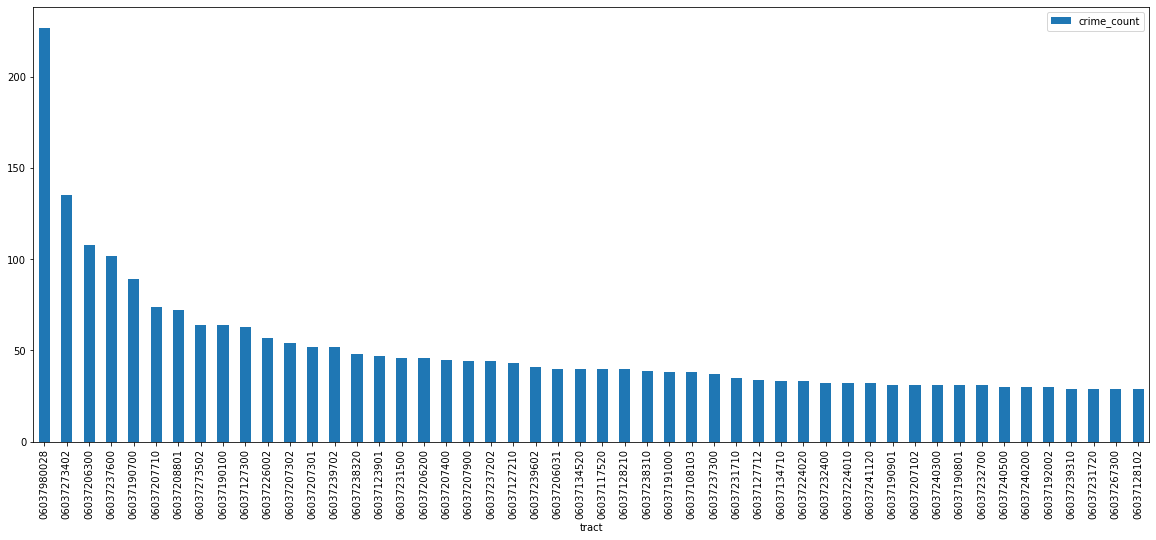

In [99]:
#plot bar
crime_by_tracts[:50].plot.bar(figsize=(20,8),x='tract',y='crime_count')

In [100]:
df_subset.head()

,arst_date,grp_description,arst_typ_cd,lat,lon
0,2020-09-14T00:00:00.000,NaN,M,33.9455,-118.4006
1,2020-07-09T00:00:00.000,Liquor Laws,I,34.2129,-118.6031
2,2020-07-29T00:00:00.000,NaN,M,34.1721,-118.5709
3,2020-09-16T00:00:00.000,Liquor Laws,I,34.1938,-118.5884
4,2020-07-23T00:00:00.000,NaN,I,34.25,-118.5886


In [95]:
crime.set_crs(epsg=4326, inplace=True)
crime.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [146]:
tracts_ejsm = tracts_ejsm.to_crs(epsg=3857)
print(tracts_ejsm)

             FIPS                                           geometry  \
0     06037101110  MULTIPOLYGON (((-13169350.794 4063591.834, -13...   
1     06037101122  MULTIPOLYGON (((-13169466.900 4065590.632, -13...   
2     06037101210  MULTIPOLYGON (((-13169034.646 4063225.625, -13...   
3     06037101220  MULTIPOLYGON (((-13167528.828 4062280.326, -13...   
4     06037101300  MULTIPOLYGON (((-13166031.469 4060067.620, -13...   
...           ...                                                ...   
2337  06037980026  MULTIPOLYGON (((-13174854.541 4066507.512, -13...   
2338  06037980028  MULTIPOLYGON (((-13186067.419 4021171.146, -13...   
2339  06037980030  MULTIPOLYGON (((-13184360.001 4017581.166, -13...   
2340  06037980031  MULTIPOLYGON (((-13167459.698 3989740.651, -13...   
2341  06037980033  MULTIPOLYGON (((-13162931.667 3990030.906, -13...   

      OBJECTID  CIscore  HazScore  HealthScore  SVscore  CCVscore  \
0         1464       10         3            1        3         3 

In [1]:
from keplergl import KeplerGl

In [148]:
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [149]:
map.add_data(data=df_,name='arrests')
map

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [], 'interactionConfig': {'…

In [ ]:
df_mini = df[['arst_date','age','descent_cd','grp_description','lat','lon']].copy()
df_mini.head()